# Credit Consistency Test

### Import libraries

In [21]:
import os
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../scr/')
from analysis import *
from data_preprocessing import *
from plot import *
from utils import *


 ### Feature Numbers and Model Types

In [22]:
feature_numbers = ['9', '20']  
model_types = ['LP','RP']  

### Load CSV files

In [23]:
df_predictions = load_and_clean_predictions('credit','predictions',feature_numbers, model_types, data_path='../predictions/')

Loaded file: ../predictions/credit_predictions_9LP_1204_2151.csv for model 9LP
Loaded file: ../predictions/credit_predictions_9RP_1204_2202.csv for model 9RP
Loaded file: ../predictions/credit_predictions_20LP_1104_2235.csv for model 20LP
Loaded file: ../predictions/credit_predictions_20RP_1104_2259.csv for model 20RP


### Mean of Absolute Differences 

\begin{align}
{\text{Mean of Absolute Differences}} = \frac{1}{N} \sum_{i=1}^{N} \left| M_i^{F_1, T}(x) - M_i^{F_2, T}(x) \right|
\text{,} \quad F_1 \neq F_2  \notag
\end{align}


In [24]:
abs_diff = {model_type: {} for model_type in model_types}

for model_type in model_types: 
    suffix = 'LM' if model_type == 'LP' else 'RM'

    prefix_1_9vs20 = f'9{suffix}' 
    prefix_2_9vs20 = f'20{suffix}'  
    abs_diff[model_type]['abs_diff_9vs20'] = compute_absolute_difference(
                df_predictions['9'][model_type], 
                df_predictions['20'][model_type],
                substring_1=prefix_1_9vs20, 
                substring_2=prefix_2_9vs20
            )

In [25]:
#abs_diff['RP']['abs_diff_9vs20']

### Combined STDs of Absolute Differences

In [27]:
std_all_results = {}

for model_type in abs_diff:

    data = abs_diff[model_type]['abs_diff_9vs20'].iloc[:, 1:]

    all_values = data.values.flatten()
    all_values = all_values[~np.isnan(all_values)] 
    
    std_all_results[model_type] = np.std(all_values)

for model_type, std_value in std_all_results.items():
    print(f"Combined STD for model type {model_type}: {std_value}")

Combined STD for model type LP: 0.08937730716856906
Combined STD for model type RP: 0.08492142137355009


### STDs of Absolute Differences

In [28]:
std_results = {model_type: {} for model_type in model_types}

for model_type in model_types:
    std_results[model_type] = abs_diff[model_type]['abs_diff_9vs20'].iloc[:, 1:].apply(lambda row: row.std(skipna=True), axis=1)


In [29]:
#std_results['RP']
#std_results['LP']

### Visualization for Consistency Check

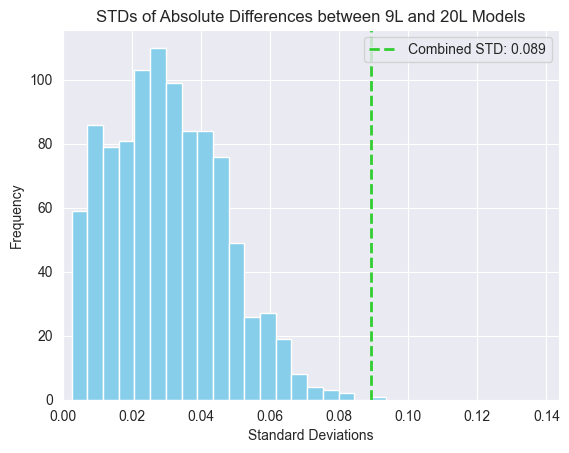

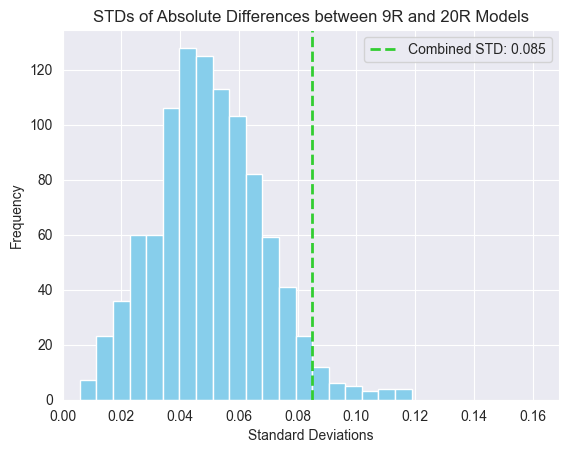

In [30]:
plot_std_histogram(std_results['LP'], std_all_results['LP'] ,'STDs of Absolute Differences between 9L and 20L Models')
plot_std_histogram(std_results['RP'],std_all_results['RP'] , 'STDs of Absolute Differences between 9R and 20R Models')
